In [1]:
#reading the data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('diabetic_data_sampled.csv')

In [98]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,60753,170043306,43951986,Caucasian,Male,[50-60),?,3,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
1,84068,264404190,41103801,Caucasian,Female,[50-60),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
2,58710,166069038,85378401,Caucasian,Female,[80-90),?,1,6,1,...,No,No,No,No,No,No,No,No,Yes,<30
3,24001,81704184,21255471,Caucasian,Female,[50-60),?,2,1,1,...,No,No,No,No,No,No,No,No,Yes,<30
4,20797,72981234,8641071,Caucasian,Female,[80-90),?,1,1,7,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
#since it is a multi-class classification problem.The labels are assigned by creating new column OUTPUT

In [107]:
df['OUTPUT']=df['readmitted'].copy()
df['OUTPUT']=df['OUTPUT'].replace('<30',1)
df['OUTPUT']=df['OUTPUT'].replace('>30',2)
df['OUTPUT']=df['OUTPUT'].replace('NO',3)
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT
0,60753,170043306,43951986,Caucasian,Male,[50-60),?,3,1,1,...,No,No,No,No,No,No,No,Yes,NO,3
1,84068,264404190,41103801,Caucasian,Female,[50-60),?,1,1,7,...,Down,No,No,No,No,No,Ch,Yes,>30,2
2,58710,166069038,85378401,Caucasian,Female,[80-90),?,1,6,1,...,No,No,No,No,No,No,No,Yes,<30,1
3,24001,81704184,21255471,Caucasian,Female,[50-60),?,2,1,1,...,No,No,No,No,No,No,No,Yes,<30,1
4,20797,72981234,8641071,Caucasian,Female,[80-90),?,1,1,7,...,No,No,No,No,No,No,No,No,NO,3


In [108]:
df['LESSTHAN30DAYS']=(df.readmitted=='<30')
df['GREATEERTHAN30DAYS']=(df.readmitted=='>30')
df['NOREADMISSION']=(df.readmitted=='NO')


In [109]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))


In [110]:
print('Prevalence:%.3f'%calc_prevalence(df['LESSTHAN30DAYS'].values))
print('Prevalence:%.3f'%calc_prevalence(df['GREATEERTHAN30DAYS'].values))
print('Prevalence:%.3f'%calc_prevalence(df['NOREADMISSION'].values))

Prevalence:0.111
Prevalence:0.347
Prevalence:0.542


- examide and citoglipton only have 1 value, so we will not use these variables

In [111]:
# ?(Unknown values) are changed into NotaNumber format(NaN)

In [112]:
df = df.replace('?',np.nan)

In [113]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT,LESSTHAN30DAYS,GREATEERTHAN30DAYS,NOREADMISSION
0,60753,170043306,43951986,Caucasian,Male,[50-60),NaN,3,1,1,...,No,No,No,No,Yes,NO,3,False,False,True
1,84068,264404190,41103801,Caucasian,Female,[50-60),NaN,1,1,7,...,No,No,No,Ch,Yes,>30,2,False,True,False
2,58710,166069038,85378401,Caucasian,Female,[80-90),NaN,1,6,1,...,No,No,No,No,Yes,<30,1,True,False,False
3,24001,81704184,21255471,Caucasian,Female,[50-60),NaN,2,1,1,...,No,No,No,No,Yes,<30,1,True,False,False
4,20797,72981234,8641071,Caucasian,Female,[80-90),NaN,1,1,7,...,No,No,No,No,No,NO,3,False,False,True


Numerical Feature

In [114]:
numerical_cols=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

In [115]:
df[numerical_cols].isnull()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


Categorical Feature

In [116]:
categorical_cols=['race','gender','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','payer_code']

In [117]:
df[categorical_cols].isnull().sum()

race                         1142
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  19926
dtype: int64

In [118]:
df['race']=df['race'].fillna('Unknown')
df['payer_code']=df['payer_code'].fillna('Unknown')
df['medical_specialty']=df['medical_specialty'].fillna('Unknown')

In [119]:
# All the NaN are replaced with 'Unknown' to identify the changes brought by the variable

In [120]:
print('Number medical speciality',df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending=False)

Number medical speciality 66


medical_specialty
Unknown                                 24564
InternalMedicine                         7157
Emergency/Trauma                         3716
Family/GeneralPractice                   3711
Cardiology                               2556
Surgery-General                          1530
Nephrology                                797
Orthopedics                               686
Orthopedics-Reconstructive                597
Radiologist                               562
Psychiatry                                440
Pulmonology                               423
Urology                                   359
ObstetricsandGynecology                   332
Surgery-Cardiovascular/Thoracic           324
Gastroenterology                          279
Surgery-Vascular                          264
Surgery-Neuro                             232
PhysicalMedicineandRehabilitation         195
Oncology                                  171
Pediatrics                                123
Neurology       

In [121]:
# Since the contributing from the values in medical_speciality is very diverse. 
#Only the top 10 influential values are taken and other values are clubbed inside "Other"

In [122]:
top10=['Unknown','InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

In [123]:
df['med_spec']=df['medical_specialty'].copy()
df.loc[~df.med_spec.isin(top10),'med_spec']='Other'

In [124]:
df.groupby('med_spec').size()

med_spec
Cardiology                     2556
Emergency/Trauma               3716
Family/GeneralPractice         3711
InternalMedicine               7157
Nephrology                      797
Orthopedics                     686
Orthopedics-Reconstructive      597
Other                          4124
Radiologist                     562
Surgery-General                1530
Unknown                       24564
dtype: int64

In [125]:
#The categorical column are identified and changed to numberical

In [126]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')
df_cat = pd.get_dummies(df[categorical_cols + cols_cat_num + ['med_spec']],drop_first = True)
df = pd.concat([df,df_cat], axis = 1)


In [127]:
cols_all_cat = list(df_cat.columns)

In [128]:
df[['age', 'weight']].head()

,age,weight
0,[50-60),NaN
1,[50-60),NaN
2,[80-90),NaN
3,[50-60),NaN
4,[80-90),NaN


In [129]:
df.groupby('age').size()

age
[0-10)         70
[10-20)       371
[20-30)       786
[30-40)      1882
[40-50)      4770
[50-60)      8534
[60-70)     11006
[70-80)     12772
[80-90)      8418
[90-100)     1391
dtype: int64

In [130]:
# The age column containing values range is converted into numerical values

In [131]:
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

df.weight.notnull().sum()


1574

In [132]:
df['has_weight'] = df.weight.notnull().astype('int')
cols_extra = ['age_group','has_weight']
print('Total number of features:', len(numerical_cols + cols_all_cat + cols_extra))
print('Numerical Features:',len(numerical_cols))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 143
Numerical Features: 11
Categorical Features: 130
Extra features: 2


In [133]:
#All the features(columns) and labels are added together

In [134]:
col2use = numerical_cols + cols_all_cat + cols_extra
df_data = df[col2use + ['OUTPUT']]

In [135]:
df=df.sample(n=len(df),random_state=42)
df=df.reset_index(drop=True)

In [136]:
#Data is spilt for training,testing

In [137]:
df_valid_test=df.sample(frac=0.30,random_state=42)
print('spilt size: %.3f'%(len(df_valid_test)/len(df)))

spilt size: 0.300


In [138]:
df_test=df_valid_test.sample(frac=0.5,random_state=42)
df_valid=df_valid_test.drop(df_test.index)

In [139]:
df_train_all=df.drop(df_valid_test.index)

In [140]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.LESSTHAN30DAYS.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.LESSTHAN30DAYS.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.LESSTHAN30DAYS.values)))

Test prevalence(n = 7500):0.113
Valid prevalence(n = 7500):0.108
Train all prevalence(n = 35000):0.111


In [141]:
rows_pos = df_train_all.LESSTHAN30DAYS == 1
df_train_pos = df_train_all.loc[rows_pos]
rows_neg = df_train_all.GREATEERTHAN30DAYS == 1
df_train_neg = df_train_all.loc[rows_neg]
rows_neutral = df_train_all.NOREADMISSION == 1
df_train_neutral = df_train_all.loc[rows_neutral]


In [142]:
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)
df_train = pd.concat([df_train, df_train_neutral.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

In [143]:
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)


In [144]:
print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.LESSTHAN30DAYS.values)))


Train balanced prevalence(n = 11658):0.333


In [145]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

In [146]:
df_valid['OUTPUT']

9427     3
199      3
39489    3
42724    3
10822    2
49498    3
36958    3
38695    3
1414     3
15177    2
12609    2
15908    3
821      2
13466    3
26497    2
42111    3
47609    1
41514    3
30263    3
17523    2
3850     2
40040    3
15267    3
49146    1
4892     3
22949    3
37213    3
15269    1
22367    2
46734    2
        ..
29509    1
11237    2
6480     2
36732    3
49010    3
35698    1
40429    3
3938     2
36493    2
25751    3
7729     2
40284    3
30862    3
30927    3
38208    1
15681    3
45861    3
7335     3
10649    2
36809    2
16275    3
13023    2
17113    3
28696    2
3525     3
42957    3
26210    3
38444    1
49241    3
39317    1
Name: OUTPUT, Length: 7500, dtype: int64

In [45]:
y_train = df_train['OUTPUT'].values
y_valid = df_valid['OUTPUT'].values
print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (35000, 143)
Training shapes: (11658, 143) (11658,)
Validation shapes: (7500, 143) (7500,)


In [46]:

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [48]:
thresh = 0.5
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

/home/kiran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/home/kiran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


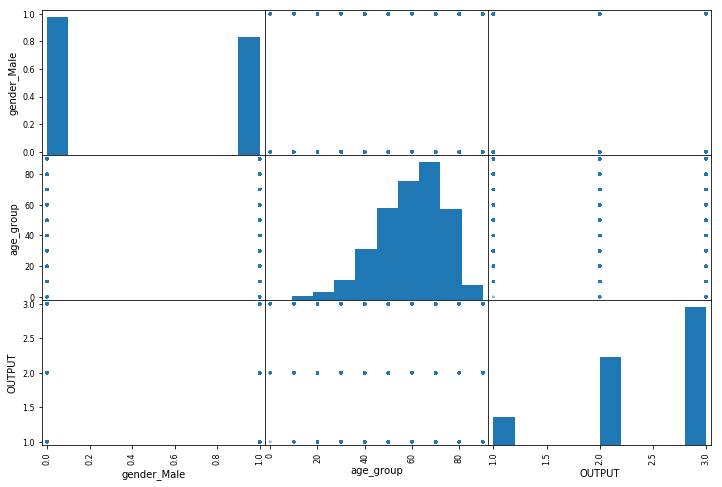

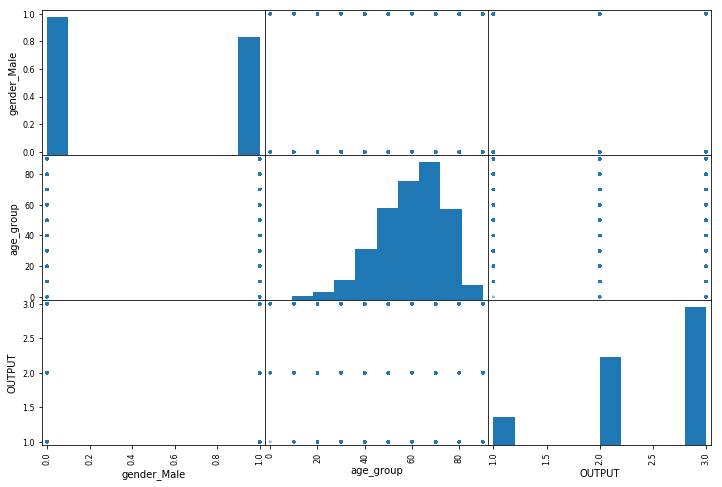

In [171]:
# make sure to specify some features that you might want to focus on or the plots might be too big
from pandas.tools.plotting import scatter_matrix
attributes = ['gender_Male','age_group','OUTPUT']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [49]:
# building the knn model

In [50]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [53]:
# the data is feed for training and tested on training dataset

In [64]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
knn = KNeighborsClassifier(n_neighbors = 400).fit(X_train_tf, y_train)   
accuracy = knn.score(X_valid_tf, y_valid) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_valid_tf)  
cm = confusion_matrix(y_valid, knn_predictions)


0.463333333333


In [75]:
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

report_with_auc = class_report(
    y_true=y_valid, 
    y_pred=knn.predict(X_valid_tf), 
    y_score=knn.predict_proba(X_valid_tf))

print(report_with_auc)


             precision    recall  f1-score  support    pred       AUC
1             0.166087  0.235222  0.194699    812.0  1150.0  0.613725
2             0.403301  0.564933  0.470626   2595.0  3635.0  0.591983
3             0.669613  0.444173  0.534078   4093.0  2715.0  0.643770
avg / total   0.522954  0.463333  0.475380   7500.0  7500.0  0.648370


In [54]:
cm

array([[ 191,  415,  206],
       [ 438, 1466,  691],
       [ 521, 1754, 1818]])

In [55]:
# building a model for logistic regression

In [56]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)
accuracy=lr.score(X_valid_tf,y_valid)
print(accuracy)

0.466


In [76]:
report_with_auc = class_report(
    y_true=y_valid, 
    y_pred=lr.predict(X_valid_tf), 
    y_score=lr.predict_proba(X_valid_tf))

print(report_with_auc)

             precision    recall  f1-score  support    pred       AUC
1             0.169781  0.391626  0.236872    812.0  1873.0  0.640270
2             0.414788  0.354528  0.382298   2595.0  2218.0  0.601009
3             0.662071  0.551429  0.601706   4093.0  3409.0  0.663062
avg / total   0.523213  0.466000  0.486292   7500.0  7500.0  0.654348


# Determining Importance of each feature

In [57]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [58]:
feature_importances.head()

,importance
number_inpatient,0.288501
nateglinide_No,0.262612
nateglinide_Steady,0.234301
acarbose_No,0.202967
discharge_disposition_id_22,0.200043


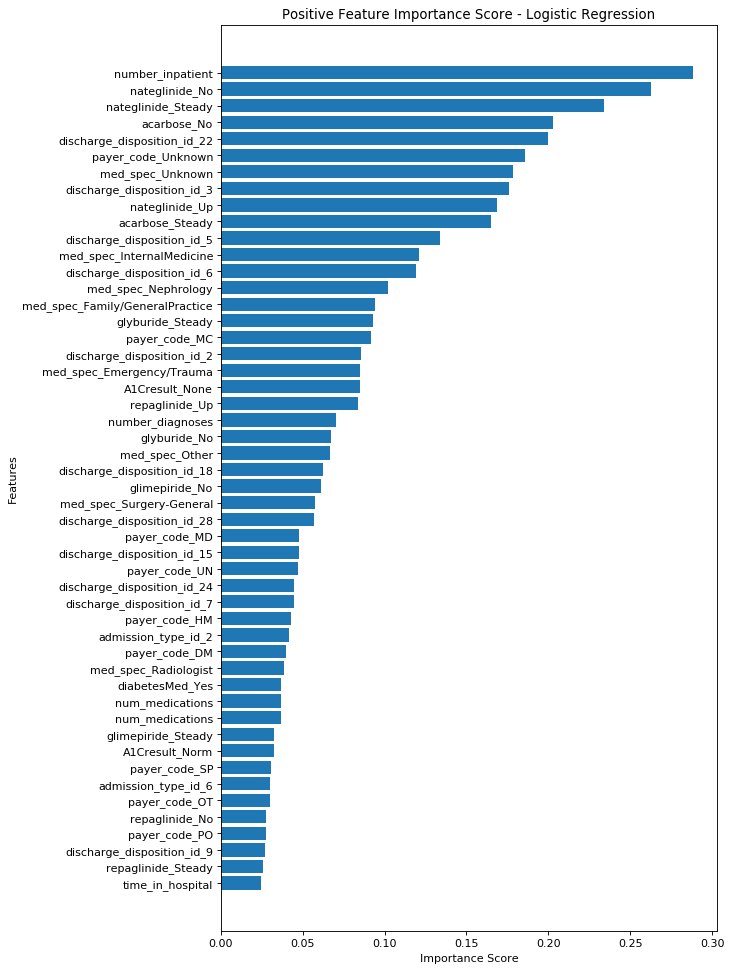

In [61]:

num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [ ]:
# The top 5 features which contributed more to change in ouput labels are:
#1.number_inpatient
#2.nateglinide_No
#3.nateglinide_Steady
#4.acarbose_No
#5.discharge_disposition_id